# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import pylab as pl

# WHO Data from kaggle

In [2]:
df = pd.read_csv("C:/Users/bablu/Life Expectancy Data.csv")

# Dropping Null Data

In [3]:
df = df.dropna(how='any', axis = 0)
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [4]:
# dividing dataset into independent and dependent variable
x = df[['Adult Mortality','infant deaths','Alcohol','Hepatitis B', 'Measles', 'under-five deaths', 'Polio', 'Diphtheria', ' HIV/AIDS']].values
y = df['Life expectancy'].values

# Visualizing Spread of Data

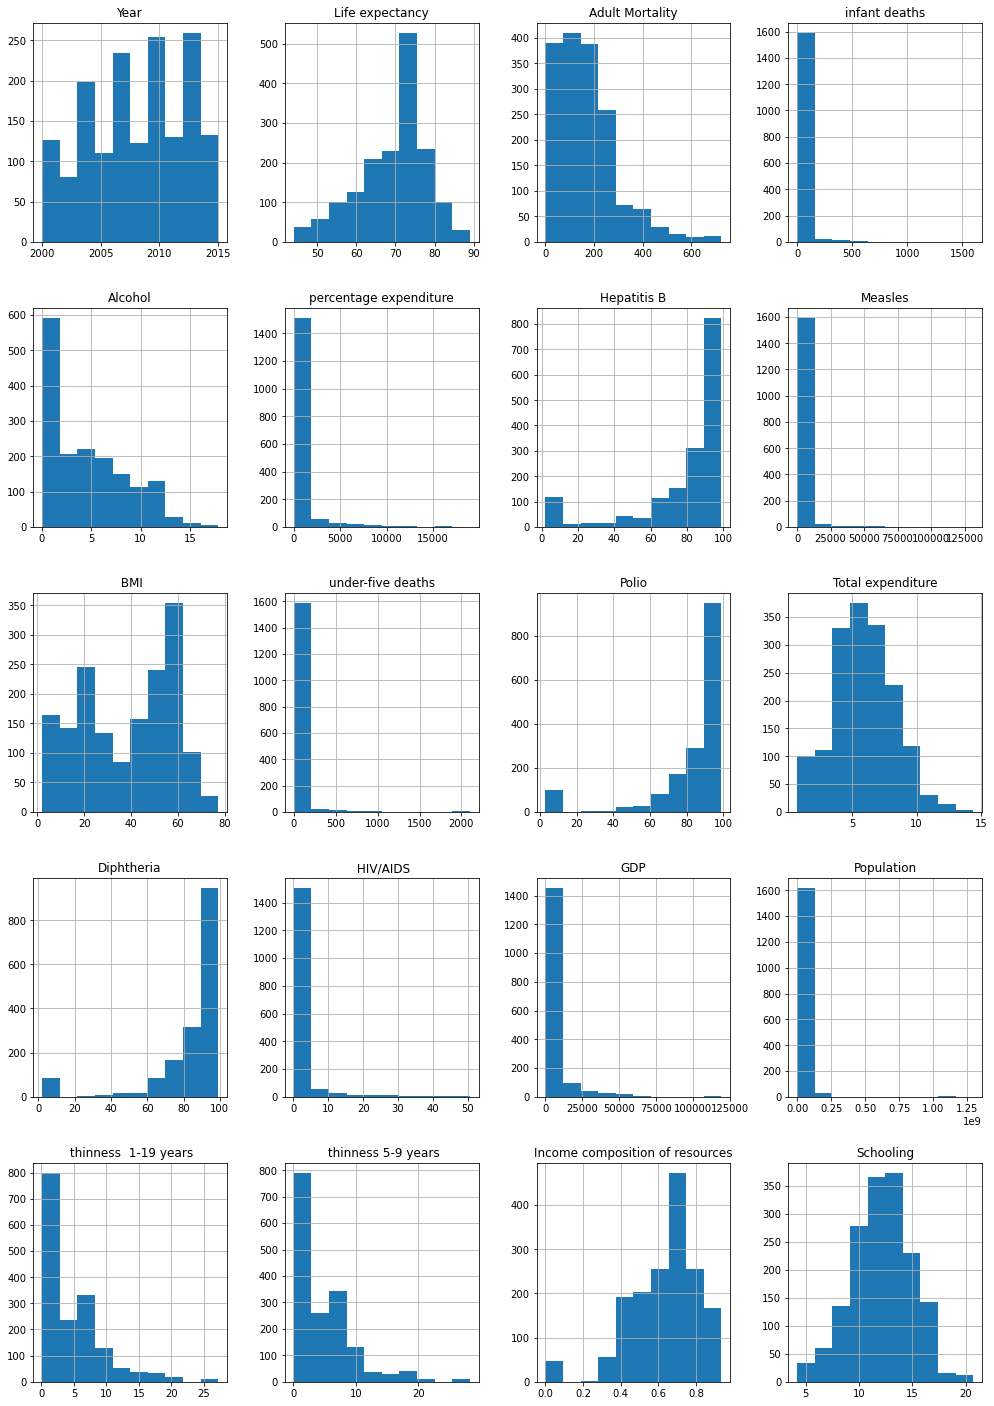

In [5]:
import matplotlib.pyplot as plt
df.hist(figsize=(17,25))
plt.show()

# Training Model

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state= 1)

In [7]:
from sklearn.linear_model import LinearRegression  
regressor= LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [8]:
from sklearn.linear_model import BayesianRidge
regressor_br= BayesianRidge()
regressor_br.fit(x_train, y_train)

BayesianRidge()

In [9]:
y_pred= regressor.predict(x_test)
y_pred_br = regressor_br.predict(x_test)

In [10]:
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pred - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_test , y_pred))


Mean absolute error: 3.38
Residual sum of squares (MSE): 21.02
R2-score: 0.73


In [11]:
y_pred_br =y_pred_br.reshape(-1,1)

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pred_br - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred_br - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_test , y_pred_br))
y_test.shape

Mean absolute error: 8.66
Residual sum of squares (MSE): 127.27
R2-score: 0.73


(330,)

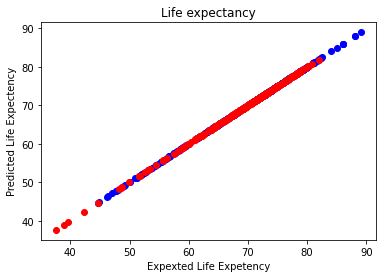

In [12]:
import matplotlib.pyplot as plt
plt.scatter( y_test, y_test, color = 'blue' )
plt.scatter( y_pred, y_pred, color = 'red' )
      
      
plt.title( 'Life expectancy' )
      
plt.xlabel( 'Expexted Life Expetency' )
      
plt.ylabel( 'Predicted Life Expectency' )
      
plt.show()